# Einführung - k-Means
Das ist der dritte Teil einer Serie von Blogbeiträgen über Machine Learning mit Python. In diesem Tutorial beschäftigen wir uns mit unbeaufsichtigtem Lernen und werden Clusteranalyse mit dem K-means Algorithmus implementieren. Grundkenntnisse in Python sind zu empfehlen. Außerdem ist es empfehlenswert, sich die vorherigen Tutorials anzusehen.

## Was ist Clusteranalyse
Clusteranalyse ist ein unbeaufsichtigtes Verfahren, das bei Machine Learning und Data Mining verwendet wird, wobei man Gruppen von ähnlichen Objekten in unbeschrifteten Daten finden will. Diese Art von Analyse findet z.B. Anwendung in verschiedenen Bereichen, wie Marketing (neue Kundengruppen auf Basis ihrer Einkäufe zu identifizieren), Biologie (Klassifizierung von Individuen oder Gen-Sequenzierung), Sozialwissenschaften (Kriminalitäts-Hotspots identifizieren) und viele weitere.


## K-Means
K-Means steht für K-Mittelwerte und ist ein interaktiver Algorithmus für Clusteranalyse. Als Eingabe bekommt der Algorithmus eine Zahl K und den Datensatz (Sammlung von Merkmale für jede Stichprobe) und versucht danach K unterschiedliche Gruppen im Datensatz zu erkennen.

![Daten](figures/cluster1.png)

### Initialisierung
Der erste Schritt ist, die Zentroiden der Cluster zu initialisieren. Am häufigsten nimmt man entweder K zufällige Stichproben aus dem Datensatz oder K zufällige Punkte dazwischen.

![Zufällige Zentroide](figures/cluster2.png)

### Verteilung der Daten unter den Clustern
Der nächste Schritt ist, jede Stichprobe in ein Cluster einzufügen. Am häufigsten verwendet man das Quadrat des euklidischen Abstands als Metrik. Das heißt, für jede Stichprobe wird das nächstliegende Zentroid gewählt.

### Aktualisierung der Mittelwerte
Zunächst werden die neuen Mittelwerte für jeden Cluster berechnet.

![Iterieren](figures/cluster25.png)

### Iteration
Die letzten zwei Schritte werden so oft wiederholt, bis der Algorithmus ein Stoppkriterium erreicht. Das kann eine Obergrenze der Iterationen sein oder eine Untergrenze der Veränderung der Koordinaten der Zentroiden. Der Algorithmus konvergiert immer, es kann aber sein, dass das keine optimale Lösung ist. In diesem Fall muss man den Algorithmus mehrfach ausführen.

![Endergebnis](figures/cluster3.png)

## Implementierung mit Python und sklearn

*Den kompletten Code finden Sie in der [Github Repository](https://github.com/emomicrowave/machine-learning-tutorials/tree/master/03-k_means_clustering)*

Für die Implementierung verwenden wir die folgenden Python-Bibliotheken: 
- `sklearn` und `numpy` algebraische Berechnungen und für eine Implementierung von K-means
- `matplotlib` für dreidimensionale Datendarstellung


In [24]:
import numpy as np
from random import randint
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

Die Bibliotheke Scikit-Learn enthält Implementierungen einer Vielfalt von Machine Learning Algorithmen. Das Modul `sklearn.cluster` enthält viele Clustering Algorithmen. Wir verwenden die Klasse `KMeans` als bereitgestellte Implementierung des K-Means Algorithmus. 

Das sind die wichtigsten Parameter für die Initialisierung der `KMeans` Klasse:
- `n_clusters` - eigenlich das K Parameter
- `init` - (`k-means++`, `random` oder `[ndarray]`) - Das Verfahren für die Anfangskoordinaten der Zentroiden.
  - falls `k-means++` ist es vorteilhaft, Koordinaten zu wählen, damit die Zentroiden schneller konvergieren
  - falls `random` werden zufälligerweise Koordinaten generiert
  - man kann auch eine Array als Argument angeben und so bestimmte Koordinaten für die Zentroiden wählen
- `n_init` - wie oft wird der Initialisierungsalgorithmus ausgeführt bevor das beste Ergebnis zurückgegeben wird
- `max_iter` - die maximale Anzahl von Iterationen bevor der Algorithmus endet.

Wichtige Methoden der `KMeans` Klasse:
- `fit(X)` - Führt K-Means clustering aus
- `predict(X)` - ergibt die Klasse (Cluster), einer oder mehrerer Stichproben
- `score(X)` - Eine Metrik für den Abstand zwischen den Clusterzentren und den dazugehörigen Stichproben

Wichtige Attribute der `KMeans` Klasse:
- `cluster_centers_` - eine Array der Länge `K`, wobei jedes Element die Zentrumkoordinaten eines Clusters darstellt
- `labels_` - eine Array mit der gleichen Anzahl von Elementen wie die Eingabe, die Bezeichner der Cluster enthält, zu denen die Eingabeelemente gehören


### Datensatz
Jetzt benötigen wir einen Datensatz und generieren einen mit `sklearn`. Die Funktion `make_blobs` aus dem Modul `sklearn.datasets` kann gaßsche Flecken generieren. Die Funktion verrät uns zwei Mengen - die Stichproben und deren Merkmale sowie die Klassen der Stichproben. Die Klassen benötigen wir für diese Aufgabe nicht. 

Außerdem habe ich das parameter `random_state` festgelegt, damit wir bei jedem Programmverlauf die gleiche Anzahl von Clustern haben und so die Parameter besser konfigurieren können. Das bedeutet, dass die Stichproben im Zentrum der Flecke dichter aneinander liegen als jene am Rand. Wir möchten auch diese Daten plotten und dafür benötigen wir eine Funktion.

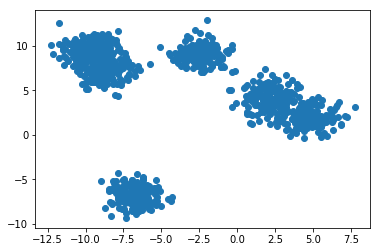

In [25]:
# Funktion, die zweidimensionalen Daten plottet
def plot2d(x,y, colors=None):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(x,y, c=colors)
    plt.show()

# Datensatz generieren
data, classes = make_blobs(n_samples=1000, centers=randint(3,8), random_state=42)
plot2d(data[:,0], data[:,1])

### Wie wählt man eine K?
Es ist offensichtlich, wie viele Cluster vorhanden sind, wir gehen aber davon aus, dass wir diese Information nicht haben. Bei hochdimensionalen Daten kann man nur schwer den Datensatz plotten und die Cluster durch Betrachten erkennen. Wir verwenden den sogenannten elbow-point (Ellenbogen-Punkt). 

Wir führen das Clustering für unterschiedliche Parameter K aus und verwenden die Summe der Quadratsabstände der Stichproben zum nächstliegenden Zentroid. Natürlich wird der Abstand durch das Erhöhen des Parameters K sinken. Es gibt aber einen Punkt, wo die Senkungsrate start abnimmt. Das ist der sogenannte Ellenbogen-Punkt und auch das perfekte K Parameter für den bestimmten Datensatz.

Clustering mit K=1
Clustering mit K=2
Clustering mit K=3
Clustering mit K=4
Clustering mit K=5
Clustering mit K=6
Clustering mit K=7
Clustering mit K=8
Clustering mit K=9
Clustering mit K=10


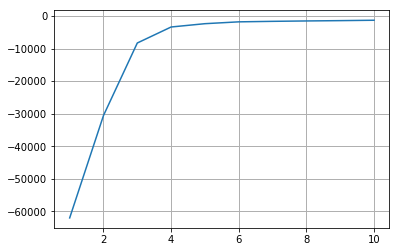

In [26]:
# Funktion, die ein Liniendiagramm zeichnet
def plot_cluster_score(x,y):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(x,y,'-')
    plt.grid(linewidth=1)
    plt.show()

# Iteration um das perfekte K zu finden 
# und das Ergebnis zu plotten
scores = []
for i in range(1,11):
    print("Clustering mit K=%d" % (i))
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data)
    scores.append([i, kmeans.score(data)])

# einfacher Daten zu plotten wenn sie ein numpy-array sind, aber
# einfacher Daten in einer python-Liste hinzufügen
scores = np.array(scores)
plot_cluster_score(scores[:,0], scores[:,1])

Es ist zu sehen, dass `k=5` für diesen Datensatz am besten geeignet ist. Deswegen erstellen wir eine Variable `K_PARAM = 5`, die wir für die weiteren Schritte nutzen und zusätzlich einfach verändern können.

### Validierung
Da die Koordinaten der Zentroiden bei jedem Verlauf zufällig initialisiert werden, kann es passieren, dass die Endergebnisse auch unterschiedlich sind. Bei großen Abweichungen kann das bedeuten, dass die Daten nicht für Clustering durch K-means geeignet sind. Deswegen werden wir das Clustering 10 Mal durchführen und dann die Summe der Quadratsabstände für jede Iteration plotten. Je flacher die Linie ist, desto stabiler der Algorithmus für diesen Datensatz.

Running iteration 0
Running iteration 1
Running iteration 2
Running iteration 3
Running iteration 4
Running iteration 5
Running iteration 6
Running iteration 7
Running iteration 8
Running iteration 9


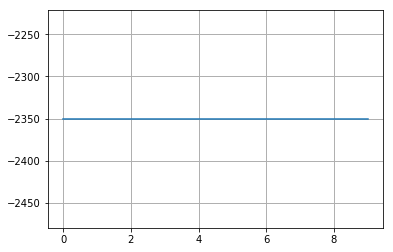

In [27]:
# K-Parameter hier setzen
K_PARAM = 5

# Iterieren um festzustellen, wie sich die Summe der Abstände
# sich für die nächste 10 Iteration verändert
scores = []
for i in range(10):
    print("Running iteration %d" % (i))
    kmeans = KMeans(n_clusters=K_PARAM)
    kmeans.fit(data)
    scores.append([i, kmeans.score(data)])

scores = np.array(scores)
plot_cluster_score(scores[:,0], scores[:,1])

Dem Diagramm zufolge sind die Daten und K perfekt für K-Means. Jetzt können wir das Clustering ein letztes Mal ausführen und das Endergebnis plotten.

Executing k-means for the last time


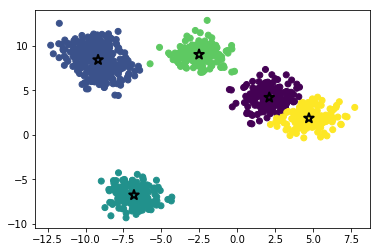

In [41]:
# Clustering zum letzten mal Ausführen und
# Endergebnis in unterschiedliche Farben plotten
print("Executing k-means for the last time")
kmeans = KMeans(n_clusters=K_PARAM)
kmeans.fit(data)

# Clusters und deren Zentroide plotten
plt.scatter(data[:,0], data[:,1], c=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0], 
            kmeans.cluster_centers_[:,1],
            c=[0,1,2,3,4],
            marker='*',
            s=100, 
            linewidths=2,
            edgecolors='black')
plt.show()

Man sieht, dass der Algorithmus die verschiedenen Gruppen sehr gut erkannt hat.

## Feature Engineering und Validierung
Da Clusteranalyse eine Art unbeaufsichtigtes Lernen ist, gibt es in der Praxis keine Testdaten, mit denen wir eine Klassifikationsgüte bestimmen können, deswegen muss man selbst Maßnahmen ergreifen, um zu prüfen, ob die Ergebnisse des Algorithmus Sinn machen.

Der hier verwendete Datensatz wurde zufällig generiert und hat deswegen keinen Bezug zur realen Welt, zusätzlich haben wir alle Merkmale des Datensatzes als Parameter eingesetzt. In der Praxis muss man sich auf sein Domainwissen und seine Erfahrung verlassen, um nur zur aktuellen Aufgaben relevante Merkmale für die Analyse zu verwenden. Das nennt man Feature Engineering.

Nachdem man den KMeans Algorithmus ausgeführt hat, muss man das Endergebnis validieren. Machen die erkannten Cluster im Kontext der bestimmten Domain Sinn? Datenvisualisierung ist oft eine gute Methode, allerdings nicht sehr effektiv für hochdimensionale Daten. Wie sieht das Ergebnis aus, wenn man andere Clustering-Algorithmen verwendet? Dies ist alerdings ein sehr breites Thema und sprengt den Rahmen dieses Blogbeitrags. Es gibt jedoch ein informatives Dokument über unterschiedliche Clustering Algorithmen und die Validierung ihrer Ergebnisse. (Link siehe unten)

## Dokumentaition
- [sklearn.cluster.KMeans](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans)
- [sklearn.datasets.make_blobs](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html#sklearn.datasets.make_blobs)

## Resourcen
- Git-Repository: [Link](https://github.com/emomicrowave/machine-learning-tutorials/tree/master/03-k_means_clustering)
- Clustering Tutorial auf Englisch: [Link](https://www.datascience.com/blog/introduction-to-k-means-clustering-algorithm-learn-data-science-tutorials)
- On Clustering Validation Techniques - Paper by Maria Halkidiki, Yannis Batistakis, Michalis Vazirgiannis - [Link](http://web.itu.edu.tr/sgunduz/courses/verimaden/paper/validity_survey.pdf)